In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc


In [2]:
df =pd.read_csv("Car_details.csv")

In [3]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(8)
memory usage: 762.1+ KB


In [5]:
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


# Dealing with Missing Values 

In [6]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
seats            221
dtype: int64

In [7]:
#for object type columns null values cant be counter therefore
df["mileage"].value_counts()

18.9 kmpl      225
19.7 kmpl      173
18.6 kmpl      164
21.1 kmpl      157
17.0 kmpl      133
              ... 
16.34 kmpl       1
19.69 kmpl       1
20.88 km/kg      1
17.8 km/kg       1
16.51 kmpl       1
Name: mileage, Length: 393, dtype: int64

In [8]:
# missing values can be filled by mean if data is numerical
# missing values can be filled by median if data is numerical and very skewed
# missing values can be filled by mode if data is categorical


Rule to handle missing data

In [9]:
#when missing values is less than 3%  -----> drop the values
#when missing values is b/w 3% to 50% -----> replace missing values with mean, median mode
#when missing values are greater than 50% -----> drop the feature

In [10]:
df["mileage"] =df["mileage"].str[0:4]

In [11]:
df["mileage"] =df["mileage"].astype('float')

In [12]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.1,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298 CC,88.2 bhp,5.0


In [13]:
df["engine"] =df["engine"].str[0:4]

In [14]:
df["engine"] =df["engine"].astype('float')

In [15]:
df["max_power"].value_counts()

74 bhp       377
81.80 bhp    220
88.5 bhp     204
67 bhp       165
46.3 bhp     162
            ... 
203.2 bhp      1
175 bhp        1
57 bhp         1
80.84 bhp      1
135.1 bhp      1
Name: max_power, Length: 322, dtype: int64

In [16]:
df["max_power"]=pd.to_numeric(df["max_power"].str.strip('bhp '))

In [17]:
str1 ="4566 bph "
str1.strip(" bph")

'4566'

In [18]:
df["max_power"] =df["max_power"].astype('float')

In [19]:
df.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000,7907.000000,7912.000000,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,19.396724,1458.625016,91.517919,5.416719
std,4.044249,8.062534e+05,5.655055e+04,4.035456,503.916303,35.822499,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,0.000000,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,16.700000,1197.000000,68.050000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,82.000000,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,22.300000,1582.000000,102.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000


In [20]:
df["max_power"] =df["max_power"].fillna(df["max_power"].mean())

In [21]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power          0
seats            221
dtype: int64

<AxesSubplot: >

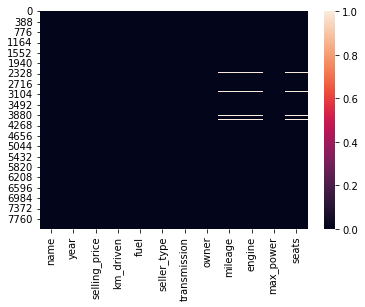

In [22]:
sns.heatmap(df.isna())

In [23]:
df["engine"] =df["engine"].fillna(df["engine"].mean())
df["seats"] =df["seats"].fillna(df["seats"].mean())
df["mileage"] =df["mileage"].fillna(df["mileage"].mean())

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        8128 non-null   float64
 9   engine         8128 non-null   float64
 10  max_power      8128 non-null   float64
 11  seats          8128 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 762.1+ KB


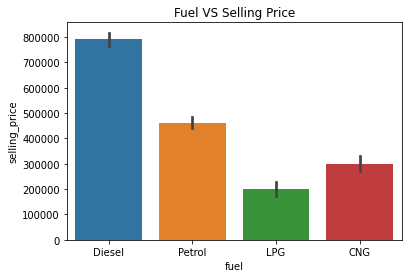

In [25]:
#Bivariate Analysis
sns.barplot(x ="fuel", y= "selling_price", data = df)
plt.title("Fuel VS Selling Price")
plt.show()

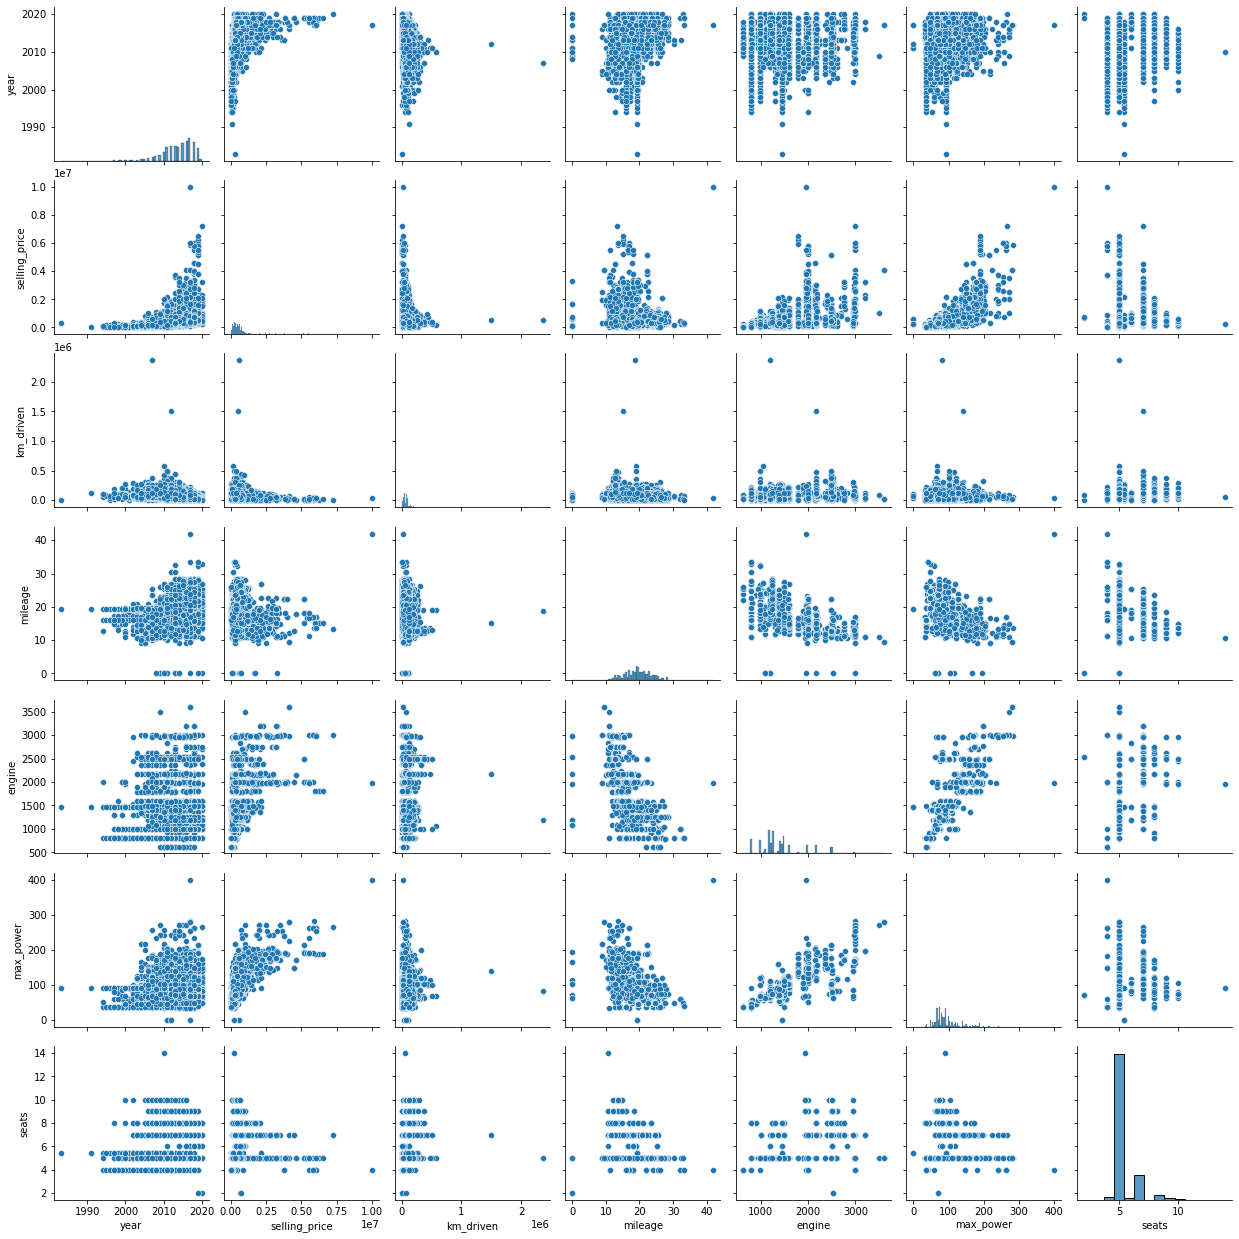

In [26]:
#Multivariate Analysis
sns.pairplot(df)

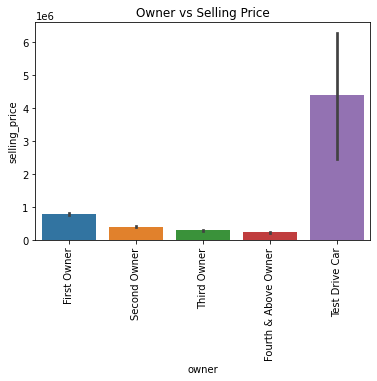

In [27]:
sns.barplot(x ="owner", y="selling_price", data =df)
plt.title("Owner vs Selling Price")
plt.xticks(rotation = 90)
plt.show()

# Dealing with Outliers

In [28]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.1,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298.0,88.20,5.0


In [29]:
catcol=[]
numcol=[]
for i in df.dtypes.index:
    if df.dtypes[i] == "object":
        catcol.append(i)
    else:
        numcol.append(i)

In [30]:
catcol

['name', 'fuel', 'seller_type', 'transmission', 'owner']

In [31]:
numcol

['year',
 'selling_price',
 'km_driven',
 'mileage',
 'engine',
 'max_power',
 'seats']

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\lenovo\anaconda3\li

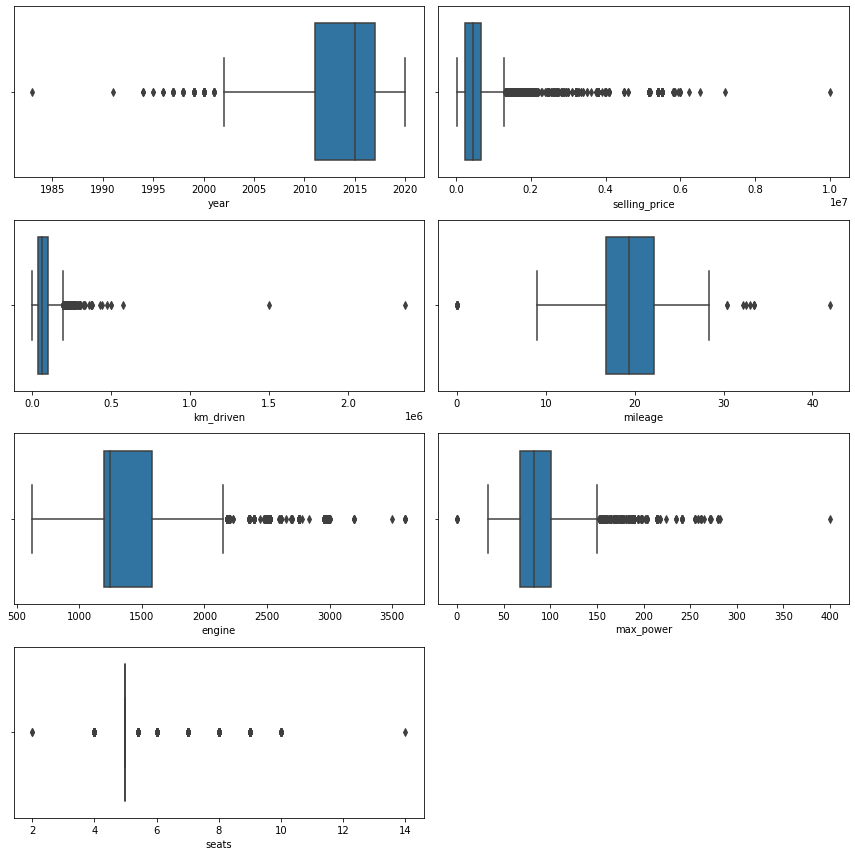

In [32]:
plt.figure(figsize=(12,12))
pltn =1
for i in numcol:
    if pltn<=8:
        ax= plt.subplot(4,2,pltn)
        sns.boxplot(df[i])
        plt.xlabel(i)
    pltn=pltn+1
plt.tight_layout()

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

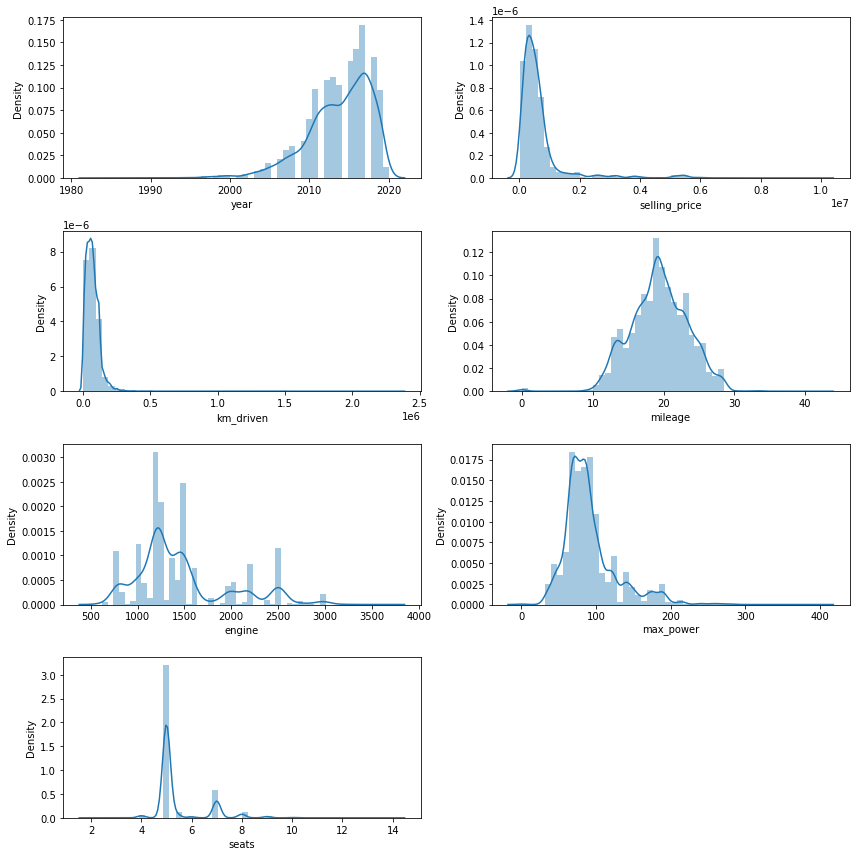

In [33]:
plt.figure(figsize=(12,12))
pltn =1
for i in numcol:
    if pltn<=8:
        ax= plt.subplot(4,2,pltn)
        sns.distplot(df[i])
        plt.xlabel(i)
    pltn=pltn+1
plt.tight_layout()

In [34]:
#outliers can be handled by
#1. IQR +- 1.5
#2. IF Z-SCORE IS > 3 remove the outlier

In [35]:
numcol

['year',
 'selling_price',
 'km_driven',
 'mileage',
 'engine',
 'max_power',
 'seats']

In [36]:
#to import z score we use
from scipy.stats import zscore
features = df[['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']]
z =np.abs(zscore(features))

In [37]:
z

,year,selling_price,km_driven,mileage,engine,max_power,seats
0,0.048464,0.233529,1.338363,1.005857,0.423804,0.495682,0.440324
1,0.048464,0.332759,0.887411,0.427962,0.079227,0.339607,0.440324
2,1.929775,0.595720,1.241098,0.426316,0.077215,0.382499,0.440324
3,0.940656,0.512615,1.011202,0.905354,0.126009,0.042951,0.440324
4,1.682495,0.630451,0.887411,0.828330,0.323198,0.093883,0.440324
...,...,...,...,...,...,...,...
8123,0.198816,0.394778,0.710567,0.225310,0.526422,0.245265,0.440324
8124,1.682495,0.624249,0.869726,0.652449,0.069167,0.522963,0.440324
8125,1.187935,0.317875,0.887411,0.024303,0.423804,0.498511,0.440324
8126,0.198816,0.431990,0.792605,1.030983,0.126009,0.608864,0.440324


In [38]:
newdf =df[(z<=3).all(axis =1)]#axis=1(columns),axis =0(rows)

In [39]:
newdf.shape

(7541, 12)

In [40]:
df.shape


(8128, 12)

In [41]:
dataloss= (8128-7541)/8128
dataloss*100

7.221948818897637

In [42]:
#IQR method causes more dataloss than zscore 

# Handling Skewness

In [43]:
df.skew()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16052\1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


year             -1.072293
selling_price     4.193533
km_driven        11.170910
mileage          -0.147383
engine            1.151019
max_power         1.643234
seats             1.997244
dtype: float64

In [44]:
newdf.skew()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16052\2108017343.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  newdf.skew()


year            -0.726298
selling_price    2.576314
km_driven        0.758979
mileage          0.012954
engine           1.165252
max_power        1.108981
seats            1.843779
dtype: float64

#obsered that the skewness reduces after removing outlier

skewness of the target variable showed be left untouched

<AxesSubplot: >

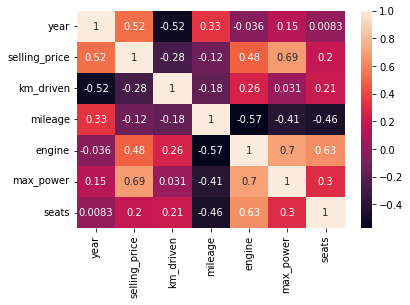

In [47]:
sns.heatmap(newdf.corr(),annot =True)

In [48]:
#the column year and max-power are in good correlation with trget variable i.e selling price 
#therefore the skewness of these features should nnot change

In [49]:
newdf.skew()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16052\2108017343.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  newdf.skew()


year            -0.726298
selling_price    2.576314
km_driven        0.758979
mileage          0.012954
engine           1.165252
max_power        1.108981
seats            1.843779
dtype: float64

In [50]:
#if skewness of columns with n correlation with target is >0.5 then remove skewness of those columns

In [51]:
#to handle skewness:
#1. Log Transformation
#2. Square Root Transformation
#3. power Transformation
#   a. yeo-johnson method(for both +ve an -ve values)
#   b. box-cox mehtod(for only  +ve values)

In [53]:
skew1 = ['km_driven','engine','seats']
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method ="yeo-johnson")

In [54]:
newdf[skew1]=pt.fit_transform(newdf[skew1].values)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16052\1047749952.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf[skew1]=pt.fit_transform(newdf[skew1].values)


In [55]:
newdf

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,1.594771,Diesel,Individual,Manual,First Owner,23.4,-0.198415,74.00,-0.344375
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,1.179739,Diesel,Individual,Manual,Second Owner,21.1,0.434833,103.52,-0.344375
2,Honda City 2017-2020 EXi,2006,158000,1.508487,Petrol,Individual,Manual,Third Owner,17.7,0.432609,78.00,-0.344375
3,Hyundai i20 Sportz Diesel,2010,225000,1.297665,Diesel,Individual,Manual,First Owner,23.0,0.196304,90.00,-0.344375
4,Maruti Swift VXI BSIII,2007,130000,1.179739,Petrol,Individual,Manual,First Owner,16.1,-0.057825,88.20,-0.344375
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,1.005241,Petrol,Individual,Manual,First Owner,18.5,-0.350444,82.85,-0.344375
8124,Hyundai Verna CRDi SX,2007,135000,1.162619,Diesel,Individual,Manual,Fourth & Above Owner,16.8,0.423691,110.00,-0.344375
8125,Maruti Swift Dzire ZDi,2009,382000,1.179739,Diesel,Individual,Manual,First Owner,19.3,-0.198415,73.90,-0.344375
8126,Tata Indigo CR4,2013,290000,-1.036220,Diesel,Individual,Manual,First Owner,23.5,0.196304,70.00,-0.344375


In [56]:
newdf.skew()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16052\2108017343.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  newdf.skew()


year            -0.726298
selling_price    2.576314
km_driven       -0.076425
mileage          0.012954
engine          -0.003895
max_power        1.108981
seats           -0.382508
dtype: float64

In [58]:
df['fuel'].value_counts()

Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: fuel, dtype: int64

# Encoding

In [59]:
#Method 1 :get_dummies() of pandas
#uses only 1 and 0 ; should not be used for columns with multiple categories ;creates column for each unique category 

#Method 2 :OneHotEncoder() of sklearn
#uses only 1 and 0 ; should not be used for columns with multiple categories ;creates column for each unique category 

#Method 3 :LabelEncoder() of sklearn 
#Should only be used on label(target variable) and can have values from 0 to n-1 but cannot be used on multiple target at once

#Method 4 :ordinalEncoder() of sklearn
#Same as label encoder except that it can be used on features or independant variable.

In [60]:
from sklearn.preprocessing import OrdinalEncoder 
oe =OrdinalEncoder()
newdf[catcol] = oe.fit_transform(newdf[catcol])

C:\Users\lenovo\AppData\Local\Temp\ipykernel_16052\3408715558.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf[catcol] = oe.fit_transform(newdf[catcol])


In [61]:
newdf.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,1217.0,2014,450000,1.594771,1.0,1.0,1.0,0.0,23.4,-0.198415,74.00,-0.344375
1,1492.0,2014,370000,1.179739,1.0,1.0,1.0,2.0,21.1,0.434833,103.52,-0.344375
2,347.0,2006,158000,1.508487,3.0,1.0,1.0,4.0,17.7,0.432609,78.00,-0.344375
3,738.0,2010,225000,1.297665,1.0,1.0,1.0,0.0,23.0,0.196304,90.00,-0.344375
4,1259.0,2007,130000,1.179739,3.0,1.0,1.0,0.0,16.1,-0.057825,88.20,-0.344375


<AxesSubplot: >

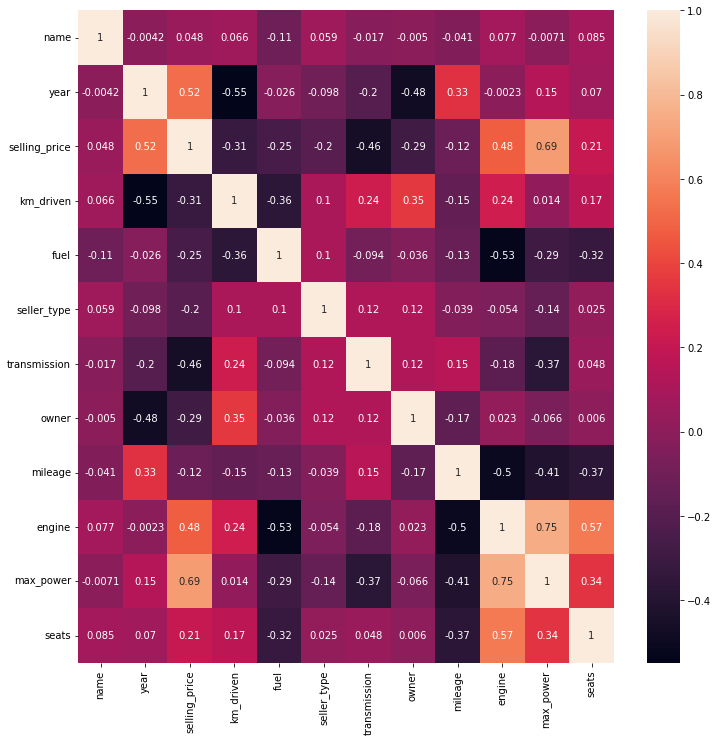

In [63]:
plt.figure(figsize =(12,12))
sns.heatmap(newdf.corr(),annot =True)

# Feature Scaling

## only done on features and not on labels


### method 1: MinMax Scaler -Normalization
#### values range from 0 to 1
#### Xnew = X -Xmin/(Xmax-Xmin)

### method 2: StandardScaler - Standardization
#### values are in -ve to +ve with mean as zero(So in form of a normal distribution)
#### Xnew = X -mean/(sd)

In [65]:
x=newdf.drop("selling_price", axis =1)
y=newdf["selling_price"]

In [66]:
x

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,1217.0,2014,1.594771,1.0,1.0,1.0,0.0,23.4,-0.198415,74.00,-0.344375
1,1492.0,2014,1.179739,1.0,1.0,1.0,2.0,21.1,0.434833,103.52,-0.344375
2,347.0,2006,1.508487,3.0,1.0,1.0,4.0,17.7,0.432609,78.00,-0.344375
3,738.0,2010,1.297665,1.0,1.0,1.0,0.0,23.0,0.196304,90.00,-0.344375
4,1259.0,2007,1.179739,3.0,1.0,1.0,0.0,16.1,-0.057825,88.20,-0.344375
...,...,...,...,...,...,...,...,...,...,...,...
8123,728.0,2013,1.005241,3.0,1.0,1.0,0.0,18.5,-0.350444,82.85,-0.344375
8124,613.0,2007,1.162619,1.0,1.0,1.0,1.0,16.8,0.423691,110.00,-0.344375
8125,1229.0,2009,1.179739,1.0,1.0,1.0,0.0,19.3,-0.198415,73.90,-0.344375
8126,1582.0,2013,-1.036220,1.0,1.0,1.0,0.0,23.5,0.196304,70.00,-0.344375


In [67]:
y

0       450000
1       370000
2       158000
3       225000
4       130000
         ...  
8123    320000
8124    135000
8125    382000
8126    290000
8127    290000
Name: selling_price, Length: 7541, dtype: int64

In [68]:
from sklearn.preprocessing import StandardScaler
sc =StandardScaler()
x= sc.fit_transform(x)
x

array([[ 0.46347312,  0.02948339,  1.59477108, ..., -0.19841523,
        -0.48350158, -0.34437502],
       [ 1.01169855,  0.02948339,  1.17973907, ...,  0.4348328 ,
         0.55850139, -0.34437502],
       [-1.27091281, -2.12127137,  1.50848742, ...,  0.43260882,
        -0.34230877, -0.34437502],
       ...,
       [ 0.48739568, -1.31473833,  1.17973907, ..., -0.19841523,
        -0.4870314 , -0.34437502],
       [ 1.19111779, -0.23936095, -1.0362203 , ...,  0.19630388,
        -0.6246944 , -0.34437502],
       [ 1.19111779, -0.23936095, -1.0362203 , ...,  0.19630388,
        -0.6246944 , -0.34437502]])

# End of EDA

### Train Test Spilt

In [75]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state =1)
#random state is similar to seed function so every time we run this cell the xtrain ,xtest etc will remain same.

In [76]:
xtrain

array([[-1.28486764, -0.77704964,  0.91506547, ...,  0.43260882,
         1.06961938, -0.34437502],
       [-0.25021672,  0.02948339,  1.28101762, ...,  1.58464578,
         1.14021579,  1.85009371],
       [-1.21708704,  0.02948339, -0.11561176, ...,  0.43260882,
         1.04491064, -0.34437502],
       ...,
       [ 1.16719522, -0.23936095,  1.91758058, ..., -0.19841523,
         0.03891183, -0.34437502],
       [-0.58712617,  0.83601643, -0.57545806, ...,  0.19630388,
         0.03644096, -0.34437502],
       [-0.59111327,  0.83601643, -0.54595803, ...,  0.19630388,
         0.03644096, -0.34437502]])

In [77]:
xtest

array([[-0.05484911,  1.10486077, -0.37609439, ...,  1.58464578,
         2.30046774,  1.85009371],
       [ 0.57112466, -0.23936095,  0.02975001, ..., -0.35044439,
        -0.20817559, -0.34437502],
       [ 1.77323352, -1.04589399,  0.42856298, ..., -0.34430737,
        -0.4870314 , -0.34437502],
       ...,
       [ 1.69349164,  1.10486077, -2.03265367, ...,  0.43038269,
         0.62839183, -0.34437502],
       [-0.43362305,  0.02948339,  0.87840577, ...,  1.98498281,
        -0.90355021,  1.85009371],
       [ 0.63491816,  0.56717208, -0.26885344, ..., -1.04670042,
        -1.04262513, -0.34437502]])

In [79]:
from sklearn.linear_model import LinearRegression
lr =LinearRegression()
lr.fit(xtrain,ytrain)

LinearRegression()

In [80]:
ypred =lr.predict(xtest)

In [81]:
ypred

array([1218713.15092896,  378555.55135879,  303710.54370361, ...,
        822137.96064091,  321854.27983877,  478643.48237053])

In [82]:
ytest

5318    1525000
5518     411000
4176     250000
776      400000
3495     450000
         ...   
7341     910000
919      320000
1566    1000000
1826     550000
2481     300000
Name: selling_price, Length: 2263, dtype: int64